I have download the kaggle_dataset dataset

In [ ]:
!unzip 'All_Data/archive.zip'

Tasks 1:
1. Download the dataset from PTDB-TUG Dataset(subset of TIMIT)
Read about the dataset here:
https://www.spsc.tugraz.at/databases-and-tools/ptdb-tug-pitch-tracking-database-from-graz-university-of-technology.html

Please find the below link for download: 
https://www.kaggle.com/datasets/lazyrac00n/speech-activity-detection-datasets


2. Look at the structure of the dataset. Total utterances/speech samples present.

3. Create Spectrograms for each utterance and store them.

In [12]:
import soundfile as sf
from scipy.signal import butter, filtfilt
from IPython.display import Audio

def apply_low_pass_filter(data, sample_rate, cutoff_frequency):
    nyquist_frequency = 0.5 * sample_rate      # nyquist_frequency is genrerally half of sampling rate
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    order = 6  # Filter order
    # Create the low-pass Butterworth filter
    b, a = butter(order, normalized_cutoff, btype='low')   # btype low is lowpass filter
    # Apply the filter to the data
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data

def apply_high_pass_filter(data, sample_rate, cutoff_frequency):
    nyquist_frequency = 0.5 * sample_rate
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    order = 6

    b, a = butter(order, normalized_cutoff, btype='high')   # btype high is highpass filter
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data

In [15]:
import soundfile as sf
import sounddevice as sd
file = 'All_Data/Data/Audio/Male/PTDB-TUG/mic_M01_sa1.wav'
data, fs = sf.read(file,dtype='float32')
print(type(data))
print(data.shape)
Audio(file)

<class 'numpy.ndarray'>
(404160,)


In [13]:
cutoff_frequency = 4000
filtered_audio = apply_low_pass_filter(data, sample_rate, cutoff_frequency)
print("low Pass filter Audio:")
Audio(filtered_audio, rate=sample_rate)

In [14]:
cutoff_frequency = 4000
filtered_audio = apply_high_pass_filter(data, sample_rate, cutoff_frequency)
print("high pass filter Audio:")
Audio(filtered_audio, rate=sample_rate)

high pass filter Audio:


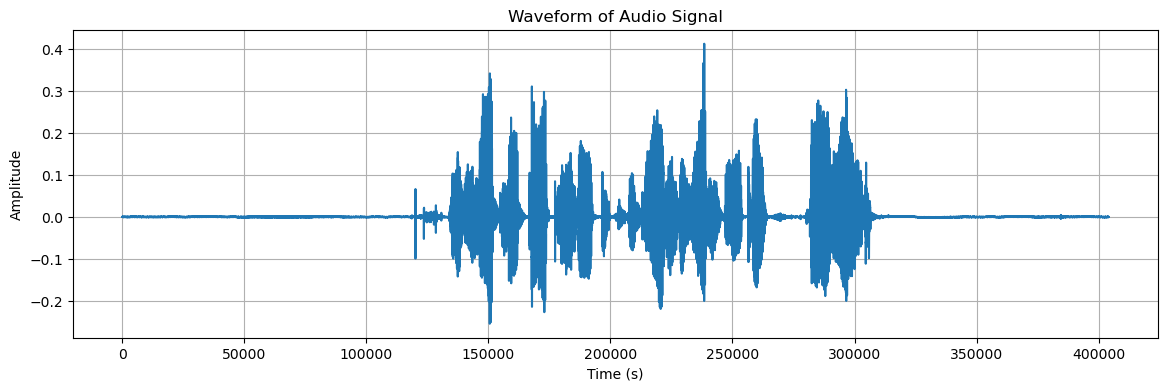

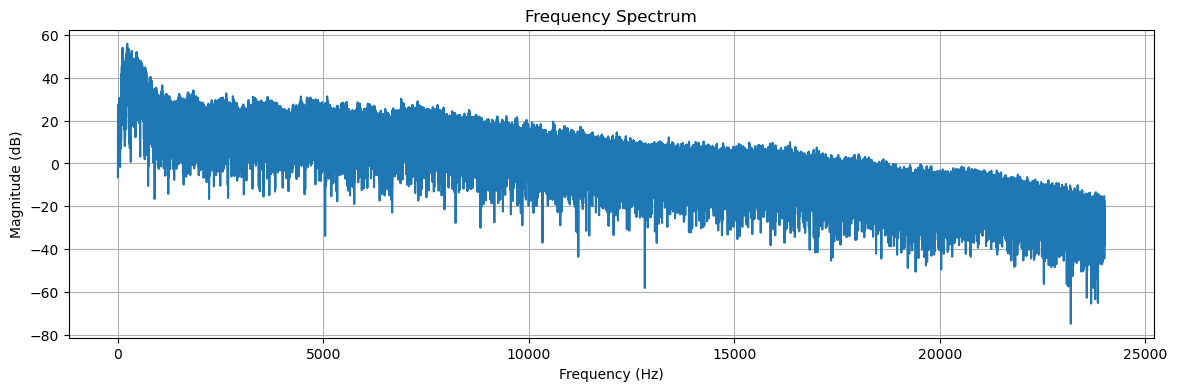

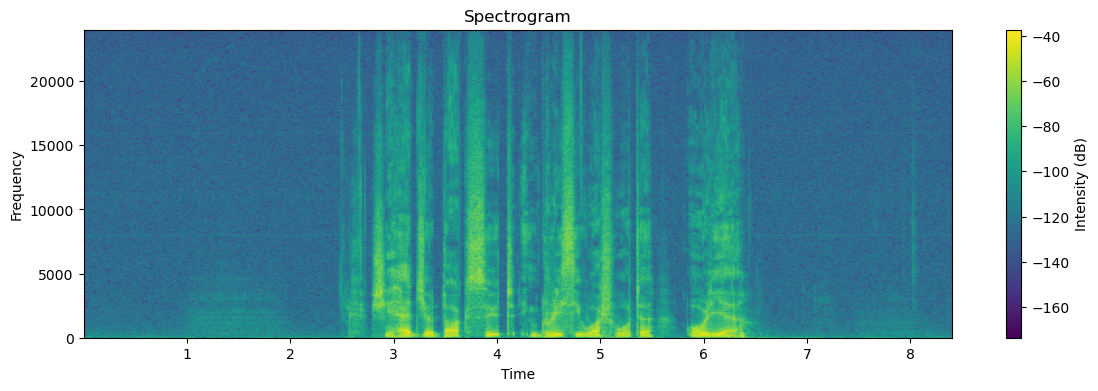

In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Waveform
plt.figure(figsize=(14, 4))
plt.plot(data)
plt.grid()
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# FFT
audio_channel = data if len(data.shape) > 1 else data
fft_result = np.fft.fft(audio_channel)
magnitude = np.abs(fft_result)
frequency = np.linspace(0, fs, len(magnitude))
# Plot the frequency graph
plt.figure(figsize=(14, 4))
plt.plot(frequency[:len(frequency)//2], 20 * np.log10(magnitude[:len(magnitude)//2]))  # Plot half of the spectrum (to avoid mirror effect)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Spectrum')
plt.grid()
plt.show()

# spectogram
plt.figure(figsize=(14, 4))
plt.specgram(data, Fs=fs, NFFT=1024, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.colorbar(label='Intensity (dB)')
plt.show()

# The below cmd is used for storing the image in image folder and it will stores the images of spectogram

This cmd will take approx 2hr of time to store and build data so i have already send you the stored data

In [6]:
# creating Spectrogram and storing them
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
res = []
clss = []
count = 0
data_folder = 'All_Data/Data/Audio/'
for path in os.listdir(data_folder):
    if os.path.isfile(os.path.join(data_folder, path)):
        res.append(path)
        clss.append(path)
    else:
        for i in os.listdir(data_folder+'/'+path):
            if os.path.isfile(os.path.join(data_folder+path, i)):
                res.append(os.path.join(data_folder+'/'+path,i))
                clss.append(path+'-'+i)
            else:
                for j in os.listdir(data_folder+'/'+path+'/'+i):
                    if os.path.isfile(os.path.join(data_folder+'/'+path+'/'+i,j)):
                        try:
                            res.append(os.path.join(data_folder+'/'+path+'/'+i,j))
                            clss.append(path+'-'+i)
                            sample_rate, audio_data = wavfile.read(os.path.join(data_folder+'/'+path+'/'+i,j))
                            Pxx, freqs, bins, im = plt.specgram(audio_data, NFFT=1024, Fs=8000, noverlap=900)
                            plt.axis('off')
                            output_directory = 'All_Data/image'+'/'+path+'/'+i+'/'
                            if not os.path.exists(output_directory):
                                os.makedirs(output_directory)
                            plt.savefig(output_directory+j+'.png',bbox_inches='tight')
                            count += 1
                            print(count,end='/')
                        except ValueError as ve:
                            print(f"Error during spectrogram computation: {ve}")
df = pd.DataFrame({'Path':res,'Class':clss})
df.head()